In [1]:
%matplotlib notebook

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
plt.ioff()

import seaborn as sns
sns.set()

from regressors.polynomial import PolynomialRegressor, XYPair

In [3]:
n = 1000
x_dom = 3*np.pi

In [4]:
X = np.zeros((2, n))
X[0] = np.linspace(-x_dom, x_dom, n)
X[1] = np.sin(np.linspace(-x_dom, x_dom, n))
E = np.random.random((n)) - 0.5
Y = (X[0] + X[1] + E) * ((X[0] + X[1] + E) - x_dom) * ((X[0] + X[1] + E) + x_dom)
Y_upper_bound = (X[0] + X[1] + 0.5) * ((X[0] + X[1] + 0.5) - x_dom) * ((X[0] + X[1] + 0.5) + x_dom)
Y_lower_bound = (X[0] + X[1] - 0.5) * ((X[0] + X[1] - 0.5) - x_dom) * ((X[0] + X[1] - 0.5) + x_dom)

In [5]:
np.save('../data/X', X)
np.save('../data/Y', Y)

np.save('../data/E', E)
np.save('../data/Y_upper_bound', Y_upper_bound)
np.save('../data/Y_lower_bound', Y_lower_bound)

In [6]:
X = X.T
Y = Y.reshape(n, 1)

<IPython.core.display.Javascript object>


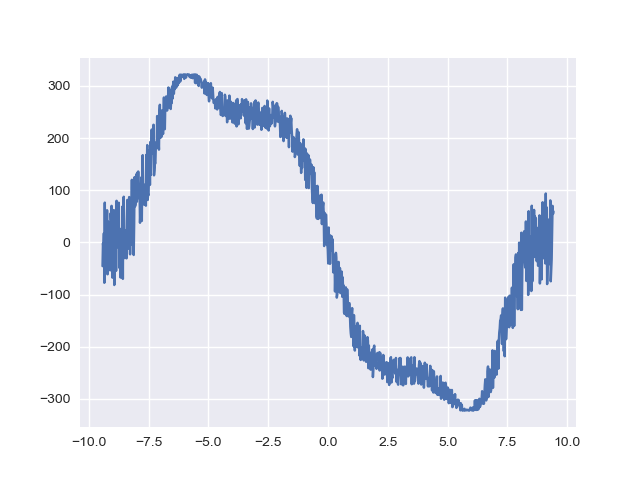

In [7]:
plt.plot(X.T[0], Y)
plt.show()

In [8]:
model = PolynomialRegressor(test_degrees=30, eps=0.01, early_stopping=True, patience=3)

In [9]:
model.fit(XYPair(X, Y), verbose=1)

degree: 0  ||  r_sqaured: -2.220446049250313e-16
degree: 1  ||  r_sqaured: 0.5133819167744458
degree: 2  ||  r_sqaured: 0.5134266170597044
degree: 3  ||  r_sqaured: 0.9852332557058224
degree: 4  ||  r_sqaured: 0.9853294709736892
degree: 5  ||  r_sqaured: 0.9854676619935384
degree: 6  ||  r_sqaured: 0.9855409519580073
best_degree: 3  ||  best_r_squared: 0.9852332557058224

degree: 3  ||  r_sqaured: 0.9852332557058224


In [10]:
model.degree

3

In [11]:
model.coefs

array([[  1.97118278e+00,  -8.85142150e+01,  -8.57857155e+01,
         -5.08619513e-02,   4.50980756e-01,  -2.58421133e-03,
          9.99802040e-01,   3.00513612e+00,   3.41172673e+00,
         -2.03813426e-01]])

In [12]:
model.labels

['1',
 'x0',
 'x1',
 'x0^2',
 'x0*x1',
 'x1^2',
 'x0^3',
 'x0^2*x1',
 'x0*x1^2',
 'x1^3']

In [13]:
model.func

[(1.9711827793040138, '1'),
 (-88.514214979433945, 'x0'),
 (-85.785715462338146, 'x1'),
 (-0.050861951342000111, 'x0^2'),
 (0.45098075645725011, 'x0*x1'),
 (-0.0025842113277421142, 'x1^2'),
 (0.9998020397039028, 'x0^3'),
 (3.0051361170478263, 'x0^2*x1'),
 (3.4117267344664199, 'x0*x1^2'),
 (-0.2038134255897221, 'x1^3')]

In [14]:
model.print_func()

1.971183*1 + -88.514215*x0 + -85.785715*x1 + -0.050862*x0^2 + 0.450981*x0*x1 + -0.002584*x1^2 + 0.999802*x0^3 + 3.005136*x0^2*x1 + 3.411727*x0*x1^2 + -0.203813*x1^3


<IPython.core.display.Javascript object>


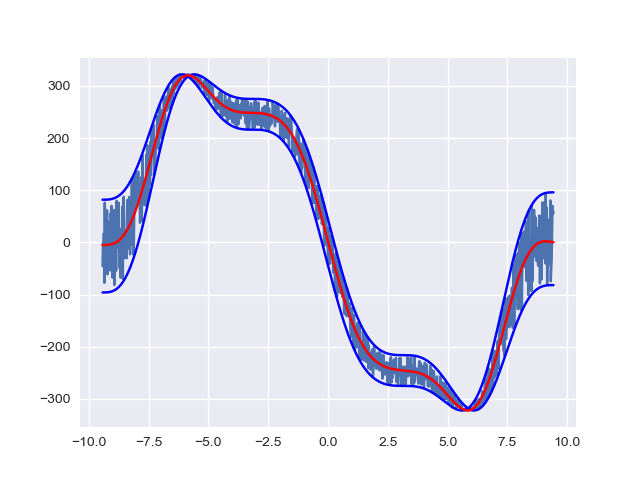

In [15]:
plt.plot(X.T[0], Y)
plt.plot(X.T[0], Y_upper_bound, c='b')
plt.plot(X.T[0], Y_lower_bound, c='b')
plt.plot(X.T[0], model.model.predict(X), c='r')
plt.show()

<IPython.core.display.Javascript object>


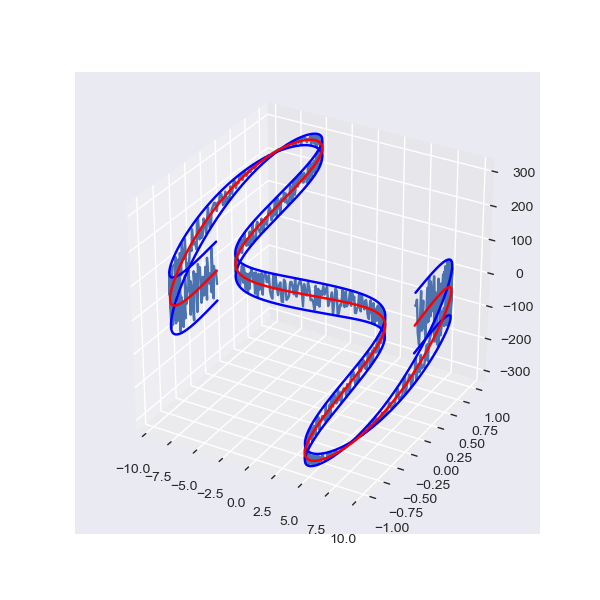

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(X.T[0], X.T[1], Y.flatten())
ax.plot(X.T[0], X.T[1], Y_upper_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], Y_lower_bound.flatten(), c='b')
ax.plot(X.T[0], X.T[1], model.predict(X).flatten(), c='r')
plt.show()